In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests



# I'm going to use keras for my simple model
import keras

# I'll use pylab for plotting
from pylab import *

#I'll use sklearn for the confusion matrix
from sklearn.metrics import confusion_matrix

#I'll also use seaborn for some plotting
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("Task 1 DNA_sequences.csv")
sequences = df['Sequences']
labels = df['labels']

In [3]:
# use one-hot encoding to get each DNA sequence in the form of a matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()
# The OneHotEncoder converts an array of integers to a sparse matrix where
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')
input_features = []

for sequence in sequences:
    integer_encoded = integer_encoder.fit_transform(list(sequence))
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CCGAGGGCTA ... CGCGGACACC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
# use one-hot encoding to encode the labels
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[0 0 0 ... 0 1 1]]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [5]:
# split the data into training and test sets
# partition the training set into a training and validation set.
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

# Model Building and Evaluation

In [6]:
# incomplete
# Build a model (preferably a deep learning classifier) to predict whether a particular sequence will bind to the protein and discover the short motif that is the binding site in the sequences that are bound to the protein.
def DNN_classifier():
    
    
    # I've turned out not to have as much time as I was hoping today. Let's start out with the simplest DNN model
    # we can imagine, if we have time later we can construct something moreinvolved
    model = keras.Sequential()
    #we'll just flatten the one hot encoded sequence
    model.add(keras.layers.Dense(500, input_shape=(200,), activation='relu'))
    # Experimented with various hidden layers lead to this
    model.add(keras.layers.Dense(50, activation='softmax'))
    model.add(keras.layers.Dense(8, activation='relu'))

    # We'll want 2 output layers since we have two possible labels, 0 or 1.
    model.add(keras.layers.Dense(2, activation='sigmoid'))
   
    model.add(keras.layers.Dense(2, activation='softmax', name='visualized_layer'))
    
    # Choose standard loss for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(train_features.reshape(-1,200),train_labels, epochs=50, batch_size=10,verbose = 0,validation_data=(test_features.reshape(-1,200), test_labels))

    #_, accuracy = model.evaluate(test_features.reshape(-1,200), test_labels)
    #print('Accuracy: %.2f' % (accuracy*100))#81.6 might be the best I can get with this simple architecture
   
    return model,history
    



16/16 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.8120
Training Accuracy: 81.20


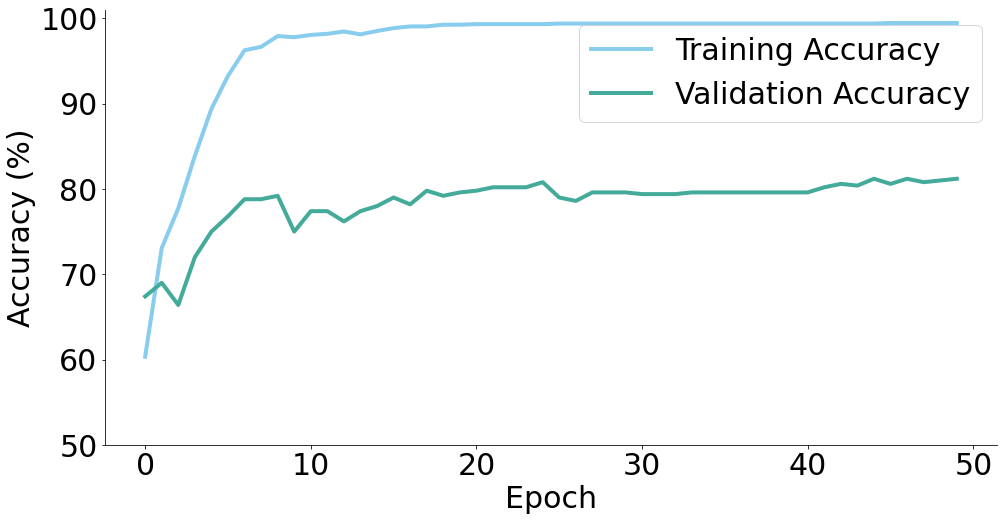

Confusion Matrix:
[[0.86026201 0.22878229]
 [0.13973799 0.77121771]]


Text(0.5, 1.0, 'Confusion  Matrix')

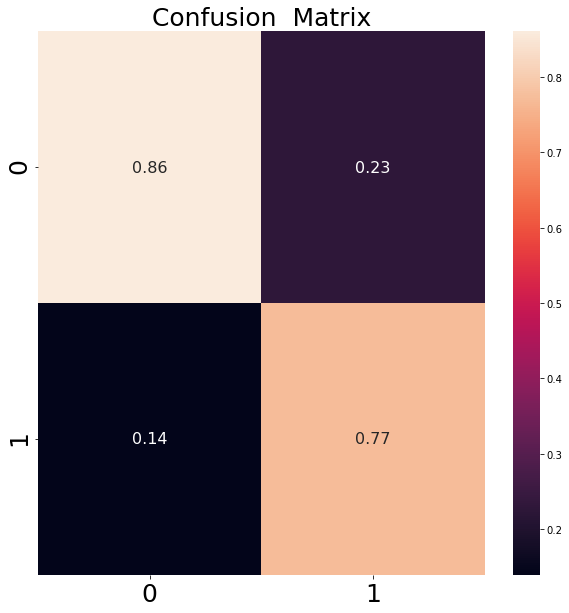

In [7]:
# incomplete
# evaluate and report the performance of the model


simpleModel,history = DNN_classifier()  


# Evaluate the final accuracy of the model
_, accuracy = simpleModel.evaluate(test_features.reshape(-1,200), test_labels)
print('Training Accuracy: %.2f' % (accuracy*100)) #81.6 might be the best I can get with this simple architecture

# Get the accuracy over the training
historical_accuracy=history.history["accuracy"]
historical_validation_accuracy=history.history["val_accuracy"]


#Plot the binary accuracy over the history of the training and validation sets
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
figure(figsize = (16,8))

# Use a colourblind-friendly colourScheme   https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
colourScheme=['#0A732D','#332288','#88CCEE',"#44AA99",'#882255','#D250BC']

plot(np.array(historical_accuracy)*100,linewidth = 4,color = colourScheme[2],label = "Training Accuracy")
plot(np.array(historical_validation_accuracy)*100,linewidth = 4,color = colourScheme[3],label = "Validation Accuracy")

xlabel("Epoch",fontsize = 30)
ylabel("Accuracy (%)",fontsize = 30)

_=xticks(fontsize = 30)
_=yticks(fontsize = 30)
ylim(50,101)

legend(fontsize = 30)
show()

# We're going to use the SK-Learn confusion_matrix function, which needs the input to be very specific
y_prediction = simpleModel.predict(test_features.reshape(-1,200))
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_test, y_prediction , normalize='pred')
print("Confusion Matrix:")
print(conf_matrix)

# Also going to heatmap the confusion matrix
cm_df = pd.DataFrame(conf_matrix,range(2),range(2))

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(conf_matrix,annot = True, ax=ax,annot_kws={"size": 16})
ax.set_xticklabels([0,1],fontsize = 25)
ax.set_yticklabels([0,1],fontsize = 25)
ax.set_title("Confusion  Matrix",fontsize = 25)

# Visualization and Interpretation

In [8]:
# compute a saliency map [the gradient of the model's prediction with respect to each individual nucleotide]
def saliency_base(model, data):
    
    # Ok looks like I'll need tensorflow proper for this
    import tensorflow as tf

    # Turn test data into a tensorflow tensor
    x_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

    # Code to extract gradients
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        output = model(x_tensor)
    result = output
    gradients = t.gradient(output, x_tensor).numpy()
    #Let's just get the average over all the test data for simplicity

    # Since the model I used above flattens out the one hot encoded nucleotides
    # The attention given to any given nucleotide is the combinaton of each 4 features
    # Let's just mean over each 4 to get the saliency for each nucleotide.
    gradients_by_nucleotide=np.average(abs(gradients).reshape(len(gradients),-1,4),axis = -1)

    sal = gradients_by_nucleotide
    return sal


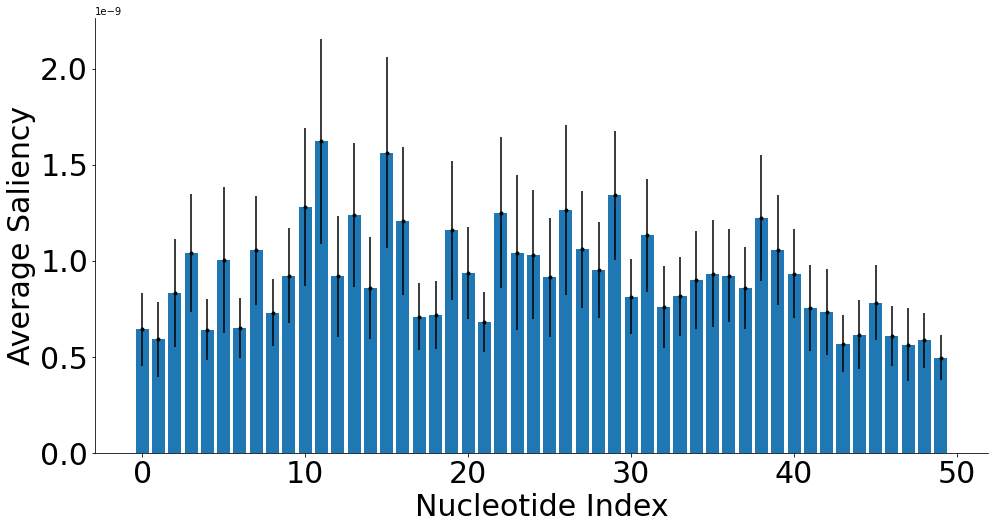

In [9]:
# Ok well here it is:
sal=saliency_base(simpleModel,input_features.reshape(-1,200))

# Let's do a quick and dirty visualization
# Let's mean over the abs of all the data to get the average attention for each nucleotide position
avg_sal = np.mean(abs(sal),axis = 0)
import scipy.stats
sem_sal = scipy.stats.sem(abs(sal),axis = 0)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

figure(figsize = (16,8))
bar(arange(len(avg_sal)),avg_sal)
errorbar(arange(len(avg_sal)),avg_sal,sem_sal,fmt=".",color = 'black')

xlabel("Nucleotide Index",fontsize = 30)
ylabel("Average Saliency",fontsize = 30)

_=xticks(fontsize = 30)
_=yticks(fontsize = 30)



# feel free to use other visualization methods here
# some examples here https://hidivelab.org/research/projects/gosling/

In [10]:
# Overall Looks like most nucleotides are used to some extent, with some clear instances of those ones
# being more important.
# Not sure if I've interpreted saliency correctly here, I'm really only familiar with this concept for image data

# I'll call it there for now since I still haven't looked at the other task